In [639]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys_names = ['../data/expriment_2_1/O_4_4_ecp','../data/expriment_2_1/O_5_3_ecp']
sys_names = ['../data/expriment_2_1/Feecp']# ,'../data/expriment_2_1/N_5_2_ecp'
picture_name = "../picture/Fe_ecp"
ref_filename = '../data_reference/Fe_0_level.csv'
ckpt_restore_filenames = []
for sys_name in sys_names:
    files = os.listdir(sys_name)
    for file in files:
        if 'ferminet_2023' in file and os.path.exists(sys_name+'/'+file+'/train_stats.csv'):
            ckpt_restore_filenames.append(sys_name+'/'+file+'/train_stats.csv')
    ckpt_restore_filenames.sort()

E = []
T = []
Var = []
S = []
S_numpy = []
Verli = []
for file_name in ckpt_restore_filenames[:]:
    df = pd.read_csv(file_name)
    S_index = []
    for col in df.columns:
        if "S_" in col:
            S_index.append(col)
    E.append(df['E_mean_clip'])
    T.append(df['delta_time'])
    Var.append(df['E_var_clip'])
    S.append(df[S_index])
    S_numpy.append(df[S_index].to_numpy())
    Verli.append((df['V_loc']+df['V_nloc']+df['V'])+df['T']*2)

Es = pd.DataFrame(E, index=[i for i in range(len(E))]).T
Es1 = pd.DataFrame(E, index=[i for i in range(len(E))]).T.rolling(window=100, center=True, min_periods=1).mean()
T = pd.DataFrame(T, index=[i for i in range(len(T))]).T
E_baseline = Es1.loc[Es1.index[-1]].min()
# E_baseline = -5.418821262745097
Es -= E_baseline
Es1 -= E_baseline

df = pd.read_csv(ref_filename, index_col=0)
df['Level (Hartree)'][3]
# 从字符串中提取数字
df['Level (Hartree)'] = df['Level (Hartree)'].str.extract('(\d+.\d+)', expand=False).astype(float)
baselines = df['Level (Hartree)'].values.tolist()[:40]

pd.DataFrame(T, index=[i for i in range(len(T))]).T
E_vars = pd.DataFrame(Var, index=[i for i in range(len(Var))]).T
Verlis = pd.DataFrame(Verli, index=[i for i in range(len(Verli))]).T

/tmp/ipykernel_17014/3043542365.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Level (Hartree)'][3]


In [640]:
Es1.loc[Es1.index[-1]]

0    0.0
Name: 19121, dtype: float64

/tmp/ipykernel_17014/2997999269.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('Set3')


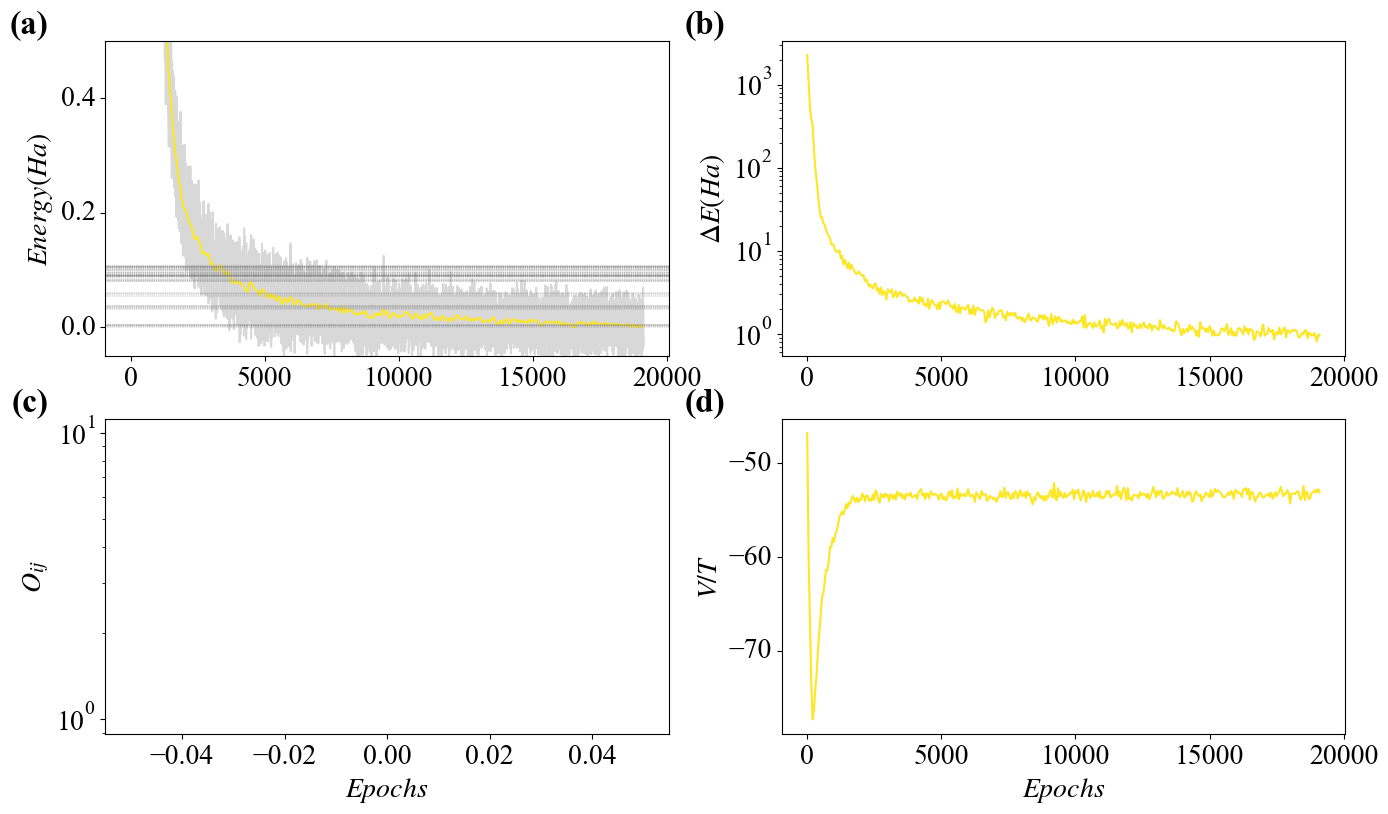

In [641]:
# 设置全局字体
plt.rc('font',family='Times New Roman')
# 设置斜体
# plt.rcParams['font.style'] = 'italic'
# 设置公式字体
plt.rcParams['mathtext.fontset'] = 'stix'
# 设置字体大小
plt.rcParams['font.size'] = 20
# 设置背景颜色
plt.rcParams['figure.facecolor'] = 'white'
# 设置背景网格
plt.rcParams['axes.grid'] = False
# 设置ylabel对齐方式为左对齐
plt.rcParams['ytick.alignment'] = 'center'
# 设置默认颜色
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap('viridis_r').colors[::8])

# 设置图片大小
plt.figure(figsize=(16, 9))
# 设置colormap
cmap = mpl.cm.get_cmap('Set3')

plt.subplot(221)
plt.plot(Es.loc[::1].rolling(window=1, center=True, min_periods=1).mean(), alpha=0.3, color='gray')
plt.plot(Es1.loc[::50], alpha=1)
plt.ylim(-0.05,0.5)
plt.ylabel('$Energy (Ha)$')
# plt.xlabel('Epochs')
# plt.xscale("log")
# plt.ylim(-2.05,-1.8)
#在左上角添加(a),(b)..
plt.text(-0.1, 1.1, '({})'.format(chr(97+0)), transform=plt.gca().transAxes,
        fontsize='large', fontweight='bold', va='top', ha='right')
# baselines=[]
for baseline in baselines:
    # 设置灰色虚线,线宽设置为0.1
    plt.axhline(y=baseline, color='gray', linestyle='--', linewidth=0.3)


plt.subplot(222)
plt.plot(E_vars.loc[::50].rolling(window=1, center=True, min_periods=1).mean(), alpha=1)
plt.yscale("log")
# plt.xlabel('Epochs')
plt.ylabel('$\Delta E (Ha)$')
plt.text(-0.1, 1.1, '({})'.format(chr(97+1)), transform=plt.gca().transAxes,
        fontsize='large', fontweight='bold', va='top', ha='right')
# plt.axhline(y=0.001, color='gray', linestyle='--')

plt.subplot(223)
# for s in S:
S_line = pd.concat(S, axis=1)
plt.plot(S_line.rolling(window=100, center=True, min_periods=1).mean().loc[::50], alpha=1)
plt.yscale("log")
plt.xlabel('$Epochs$')
plt.ylabel('$O_{ij}$')
plt.text(-0.1, 1.1, '({})'.format(chr(97+2)), transform=plt.gca().transAxes,
        fontsize='large', fontweight='bold', va='top', ha='right')

plt.subplot(224)
# 按对数显示
plt.plot(Verlis.loc[::50].rolling(window=1, center=True, min_periods=1).mean(), alpha=1)
plt.xlabel('$Epochs$')
plt.ylabel('$V/T$')
# plt.xscale("log")
# plt.ylim(-2.2,-1.8)
plt.text(-0.1, 1.1, '({})'.format(chr(97+3)), transform=plt.gca().transAxes,
        fontsize='large', fontweight='bold', va='top', ha='right')
# 保存图片
plt.savefig(picture_name+'_cerve.png', dpi=600, bbox_inches='tight')
# plt.show()

/tmp/ipykernel_17014/2253234662.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('Set3')


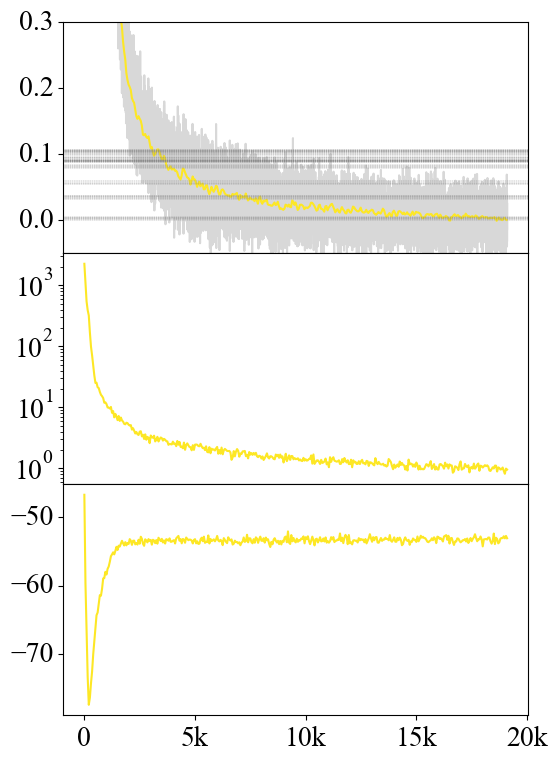

In [642]:
# 设置全局字体
plt.rc('font',family='Times New Roman')
# 设置斜体
# plt.rcParams['font.style'] = 'italic'
# 设置公式字体
plt.rcParams['mathtext.fontset'] = 'stix'
# 设置字体大小
plt.rcParams['font.size'] = 20
# 设置背景颜色
plt.rcParams['figure.facecolor'] = 'white'
# 设置背景网格
plt.rcParams['axes.grid'] = False
# 设置ylabel对齐方式为左对齐
plt.rcParams['ytick.alignment'] = 'center'
# 设置默认颜色
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.get_cmap('viridis_r').colors[::10])

# 设置图片大小
plt.figure(figsize=(6, 9))
# 设置colormap
cmap = mpl.cm.get_cmap('Set3')

plt.subplot(311)
plt.plot(Es.loc[::1].rolling(window=1, center=True, min_periods=1).mean(), alpha=0.3, color='gray')
plt.plot(Es1.loc[::50], alpha=1)
plt.ylim(-0.05,0.3)
# plt.ylabel('$Energy (Ha)$')
# 取消横坐标
plt.xticks([])
# plt.xlabel('Epochs')
# plt.xscale("log")
# plt.ylim(-2.05,-1.8)
#在左上角添加(a),(b)..
# plt.text(-0.1, 1.1, '({})'.format(chr(97+0)), transform=plt.gca().transAxes,
#         fontsize='large', fontweight='bold', va='top', ha='right')
# baselines=[]
for baseline in baselines:
    # 设置灰色虚线,线宽设置为0.1
    plt.axhline(y=baseline, color='gray', linestyle='--', linewidth=0.3)


plt.subplot(312)
plt.plot(E_vars.loc[::50].rolling(window=1, center=True, min_periods=1).mean(), alpha=1)
plt.yscale("log")
plt.xticks([])
# plt.xlabel('Epochs')
# plt.ylabel('$\Delta E (Ha)$')
# plt.text(-0.1, 1.1, '({})'.format(chr(97+1)), transform=plt.gca().transAxes,
#         fontsize='large', fontweight='bold', va='top', ha='right')
# plt.axhline(y=0.001, color='gray', linestyle='--')

plt.subplot(313)
# 按对数显示
plt.plot(Verlis.loc[::50].rolling(window=1, center=True, min_periods=1).mean(), alpha=1)
# plt.xlabel('$Epochs$')
# plt.ylabel('$V/T$')
plt.xticks([0,5000,10000,15000,20000],['0','5k','10k','15k','20k'])
# plt.xscale("log")
# plt.ylim(-2.2,-1.8)
# plt.text(-0.1, 1.1, '({})'.format(chr(97+3)), transform=plt.gca().transAxes,
#         fontsize='large', fontweight='bold', va='top', ha='right')
# 保存图片
plt.savefig(picture_name+'_cerve.png', dpi=600, bbox_inches='tight')
# plt.show()
# 设置子图间距
plt.subplots_adjust(wspace=0.3, hspace=0)

# 体现重叠矩阵的优化过程

/tmp/ipykernel_17014/3112690601.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('Blues')


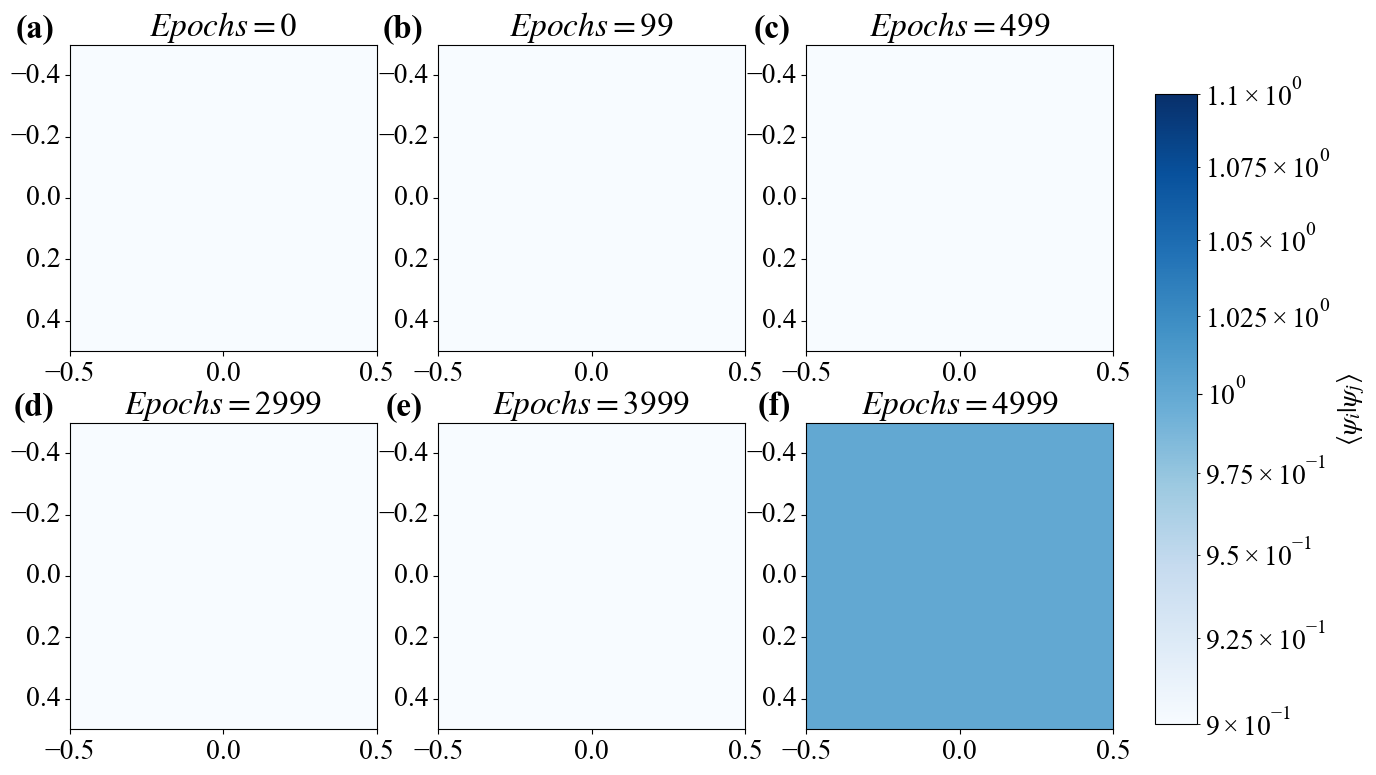

In [643]:
Ss = []
Si = [0,99,499,2999,3999,4999]
S_matrix = np.zeros((len(S),len(S),20000))
# for k in range(6):
# S_matrix = np.zeros((len(S),len(S)))
for i in range(1, len(S)):
    s = S[i].rolling(window=100, center=True, min_periods=1).mean()
    for j in range(i):
        S_matrix[i,j,0:s.shape[0]] = s[s.columns[j-1]]
    # Ss.append(S_matrix.T+S_matrix+np.tile(np.eye(len(S)))
Ss = S_matrix.swapaxes(0,1) + S_matrix+np.tile(np.eye(len(S))[..., None], 20000)

plt.figure(figsize=(14, 9))
# 循环画出Ss
cmap = mpl.cm.get_cmap('Blues')
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(Ss[:,:,Si[i]], norm=mpl.colors.LogNorm(vmin=Ss[Ss!=0].min(), vmax=Ss.max()), cmap=cmap, alpha=1)
    plt.title('$Epochs = $'+str(Si[i]))
    #在左上角添加(a),(b)..
    plt.text(-0.05, 1.1, '({})'.format(chr(97+i)), transform=plt.gca().transAxes,
            fontsize='large', fontweight='bold', va='top', ha='right')
# 共享colorbar
plt.subplots_adjust(right=0.87)
cax = plt.axes([0.9, 0.12, 0.03, 0.7])
cb = plt.colorbar(cax=cax)
cb.set_label(r'$\langle\psi_i|\psi_j\rangle$')
# 保存图片
plt.savefig(picture_name+'_overlap.png', dpi=600, bbox_inches='tight')
plt.show()

In [644]:
import numpy as np

y = T.loc[1:].mean()
x = np.linspace(0,len(y)-1,len(y))
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x,y,'v')
plt.plot(x, slope*x+intercept, 'r--')
plt.xlabel('Number of wavefunctions')
plt.ylabel('Time (s)')

print(slope)
print(intercept)


 ** On entry to DLASCL parameter number  4 had an illegal value


/home/liujinde/anaconda3/envs/ferminet/lib/python3.11/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
def findSubsetsWithSum(nums, target):
    def backtrack(start, current_subset, current_sum):
        if current_sum == target:
            subsets.append(current_subset[:])
            return
        for i in range(start, len(nums)):
            if current_sum + nums[i] <= target:
                current_subset.append(nums[i])
                current_sum += nums[i]
                backtrack(i+1, current_subset, current_sum)
                current_sum -= current_subset.pop()

    subsets = []
    backtrack(0, [], 0)
    return subsets

# 示例用法
# nums = np.linspace(1, 10, 10).tolist()
nums = [1,2,3,4,2,5,6,7,8,9,10]
target = 9
nums_t = []
for i in range(len(nums)):
    nums_t += [nums[i]]*(target//nums[i])
# nums = [[nums[i]]*(target//nums[i]) for i in range(len(nums))]
result = findSubsetsWithSum(nums, target)
print(result)

[[1, 2, 4, 2], [1, 2, 6], [1, 3, 5], [1, 2, 6], [1, 8], [2, 3, 4], [2, 2, 5], [2, 7], [3, 4, 2], [3, 6], [4, 5], [2, 7], [9]]


# 波函数节面分析
## full 11D node绘制
### 
## 固定电子节面绘制
### 固定全部电子位点，选择其中一个电子坐标进行网格化计算
### 可视化该网格下波函数

# 波函数轨道可视化